
#Loading fashion_mnist dataset with Keras

In [21]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data()

In [22]:
print(len(train_images))
print(len(train_labels))

60000
60000


In [23]:
print(len(test_images))
print(len(test_labels))

10000
10000


In [24]:
print(train_images.shape)
print(test_images.shape)


(60000, 28, 28)
(10000, 28, 28)


In [5]:
print(train_labels.shape)
print(test_labels.shape)

(60000,)
(10000,)


In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Class Label: Dress


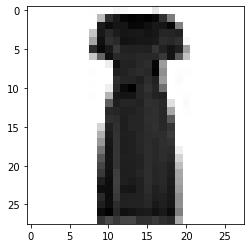

In [27]:
import matplotlib.pyplot as plt
num = 50
item=train_labels[num]
print("Class Label:", class_names[item] )
plt.imshow(train_images[num], cmap=plt.cm.binary)
plt.show()

In [28]:
import numpy as np
print(train_labels)
print(np.unique(train_labels))

[9 0 0 ... 3 0 5]
[0 1 2 3 4 5 6 7 8 9]


In [29]:
import numpy as np
print(test_labels)
print(np.unique(test_labels))

[9 2 1 ... 8 1 5]
[0 1 2 3 4 5 6 7 8 9]


In [30]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation="softmax"))

In [32]:
network.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

# Preparing The Image Data

In [33]:
train_images=train_images.reshape((60000, 28*28))
train_images=train_images.astype("float32")/255

test_images=test_images.reshape((10000, 28*28))
test_images=test_images.astype("float32")/255

In [34]:
train_labels[0]

9

# One Hot Encode

In [35]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Training

In [36]:
network.fit(train_images, train_labels, epochs=15, batch_size=128)

Epoch 1/15
469/469 [==============================] - 5s 9ms/step - loss: 1.6636 - accuracy: 0.5588
Epoch 2/15
469/469 [==============================] - 4s 9ms/step - loss: 0.7238 - accuracy: 0.7459
Epoch 3/15
469/469 [==============================] - 4s 9ms/step - loss: 0.6056 - accuracy: 0.7821
Epoch 4/15
469/469 [==============================] - 4s 9ms/step - loss: 0.5399 - accuracy: 0.8061
Epoch 5/15
469/469 [==============================] - 4s 9ms/step - loss: 0.5126 - accuracy: 0.8184
Epoch 6/15
469/469 [==============================] - 4s 9ms/step - loss: 0.4822 - accuracy: 0.8304
Epoch 7/15
469/469 [==============================] - 4s 9ms/step - loss: 0.4657 - accuracy: 0.8364
Epoch 8/15
469/469 [==============================] - 4s 9ms/step - loss: 0.4557 - accuracy: 0.8391
Epoch 9/15
469/469 [==============================] - 4s 9ms/step - loss: 0.4401 - accuracy: 0.8458
Epoch 10/15
469/469 [==============================] - 4s 9ms/step - loss: 0.4304 - accuracy: 0.8471

# Test

In [37]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("Test Loss: ", test_loss)
print("Test Accuracy:", test_acc )

313/313 [==============================] - 1s 2ms/step - loss: 0.4280 - accuracy: 0.8473
Test Loss:  0.42797303199768066
Test Accuracy: 0.8472999930381775
